## Kernel PCA for non-linear data

* Data, which isn’t linearly separable in ’n’ dimensional space may be linearly separable in a higher dimensional space.
* Kernel methods transform data into another dimension that has a clear dividing margin between classes of data

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

In [1]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

### Load Data
* make_circles : Make a large circle containing a smaller circle in 2d.
* n_samples : The total number of points generated. If odd, the inner circle will have one point more than the outer circle.
* factor : Scale factor between inner and outer circle.
* noise : Standard deviation of Gaussian noise added to the data.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

In [27]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 400, factor = .3, noise = .05)

In [28]:
# FOR RECORDING: After recording till the end, come back and use this instead of the make_circles
# line above and re-run the code till the end

# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples = 400, noise = .05)

In [29]:
X.shape

(400, 2)

In [30]:
pd.DataFrame(X).sample(10)

,0,1
66,0.462455,0.891341
356,0.148422,0.317795
7,0.273066,-0.024596
107,-0.081186,0.342858
385,0.489438,0.743986
364,0.301518,-0.221914
13,-1.041839,-0.474791
170,0.273056,0.010152
277,0.069846,-0.356188
188,-0.212709,-1.050159


In [31]:
y.shape

(400,)

In [32]:
pd.DataFrame(y).sample(10)

,0
305,1
163,1
136,0
88,0
362,1
251,1
112,0
101,1
341,0
226,1


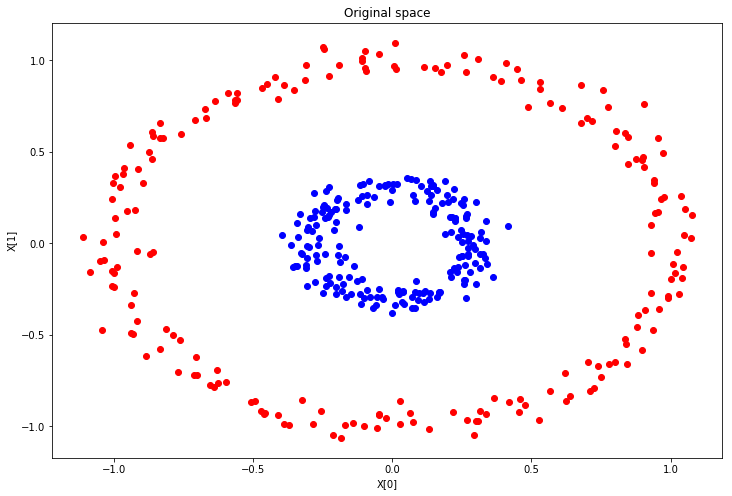

In [33]:
pl.figure(figsize = (12, 8))
pl.title("Original space")


pl.plot( X[y == 0, 0], X[y == 0, 1], "ro" )
pl.plot( X[y == 1, 0], X[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

### Apply PCA on circles and visualize results


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

In [35]:
X_new = pca.fit_transform(X)

In [36]:
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.50529144 0.49470856]


In [37]:
print (pca.components_)

[[-0.99899384  0.04484766]
 [ 0.04484766  0.99899384]]


In [38]:
X_new.shape

(400, 2)

In [39]:
pd.DataFrame(X_new).sample(10)

,0,1
30,-0.777124,-0.695716
329,-0.400452,0.971234
318,0.046356,0.316980
84,-0.894370,-0.420520
102,-0.451437,-0.845946
382,1.022768,0.282446
339,-0.330450,0.026659
206,0.269732,-0.021301
344,-0.736767,0.776635
217,-0.263112,-0.213480


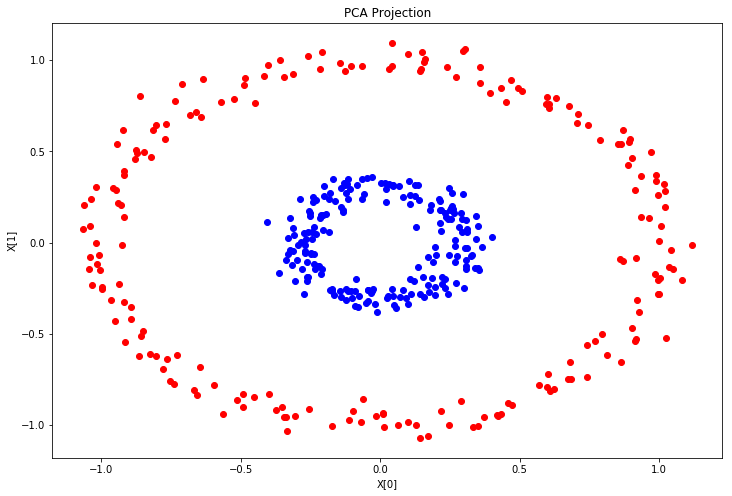

In [40]:
pl.figure(figsize = (12, 8))
pl.title("PCA Projection")


pl.plot(X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot(X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');

## Kernel PCA
Data, which isn’t linearly separable in ’n’ dimensional space may be linearly separable in a higher dimensional space.
* kernel : “linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
* gamma : Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other kernels. default=1/n_features

	
* lambdas_ : Eigenvalues of the centered kernel matrix in decreasing order. If n_components and remove_zero_eig are not set, then all values are stored.

* alphas_ : Eigenvectors of the centered kernel matrix. If n_components and remove_zero_eig are not set, then all components are stored.


In [41]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(kernel = "rbf", gamma = 3)

In [42]:
X_new = kpca.fit_transform(X)

In [43]:
X_new.shape

(400, 372)

In [44]:
pd.DataFrame(X_new).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
260,0.411846,-0.103529,0.333630,0.257689,0.320428,0.324889,0.231287,0.409957,-0.047246,-0.114258,...,-4.329149e-12,1.888994e-12,4.396975e-12,3.903946e-12,2.550269e-12,-1.280519e-14,8.909277e-13,-1.383751e-12,-4.297172e-13,2.892298e-12
367,0.365528,-0.484055,0.124533,-0.453486,0.147995,-0.075426,0.268892,-0.357039,0.017814,0.262217,...,1.422725e-12,5.098394e-11,1.766100e-11,-5.916372e-11,-8.038086e-13,6.560523e-12,1.757745e-11,1.867519e-11,-4.960023e-12,2.958318e-11
157,-0.348758,0.380637,-0.357281,-0.079987,0.123264,0.094001,0.292322,0.003377,0.039684,-0.008451,...,-1.602327e-10,4.667633e-10,4.493240e-10,-3.643163e-10,-2.695408e-10,2.547082e-10,-1.980626e-10,2.928624e-11,-3.401702e-11,1.142009e-10
32,-0.382934,-0.386001,0.313429,-0.018535,0.084698,-0.062343,-0.310488,-0.006470,-0.015729,-0.008749,...,2.134977e-10,-2.031734e-10,9.423482e-11,-2.794629e-10,-3.116218e-11,3.316152e-10,1.649992e-10,4.614961e-10,1.316580e-10,1.281198e-10
216,0.417647,-0.357880,0.174618,-0.352906,0.341856,0.025297,0.328248,-0.271154,-0.252647,0.097495,...,-1.899225e-12,1.771955e-11,-2.580408e-12,-1.835860e-11,-2.665250e-12,-3.853720e-12,7.009029e-12,-9.657072e-12,-3.477513e-12,-1.876459e-12
345,-0.459621,-0.407406,0.123427,-0.045958,-0.007470,0.044995,-0.292865,-0.018181,0.008397,0.002681,...,2.882308e-10,-7.936948e-10,3.531724e-11,-3.016163e-10,-1.977283e-10,-2.460977e-10,4.534750e-10,4.391651e-10,-1.249924e-10,7.677693e-11
353,0.409811,0.401797,0.122592,-0.321180,-0.363669,0.159953,-0.271097,-0.088299,-0.362811,-0.093979,...,5.763061e-11,1.534871e-12,-3.587317e-11,2.281959e-11,1.943571e-11,1.418704e-11,-2.081366e-11,-3.070994e-11,2.087875e-11,3.635506e-11
308,-0.423911,-0.184050,-0.425285,0.052975,-0.095697,0.294370,0.013870,0.015985,-0.041315,0.003276,...,-4.642114e-10,1.439080e-10,-4.865841e-10,-2.908230e-10,-1.945694e-10,1.398099e-10,2.929387e-10,1.989516e-10,3.764811e-10,7.742844e-11
354,-0.364617,0.411111,-0.300090,-0.099797,0.107894,0.054028,0.300107,0.013182,0.030895,-0.001254,...,2.626937e-10,-9.833172e-11,-1.610861e-10,-4.600199e-10,9.989487e-11,-1.557995e-10,8.970015e-12,-1.331097e-10,-4.113154e-11,9.382235e-11
387,0.400267,-0.438109,0.014227,-0.438137,-0.085953,-0.184363,0.305671,-0.280453,0.278466,0.228848,...,2.438217e-10,6.790867e-10,3.753560e-10,-2.109917e-10,2.916745e-10,1.079353e-10,2.143828e-10,-3.016659e-10,-2.518029e-10,3.399456e-11


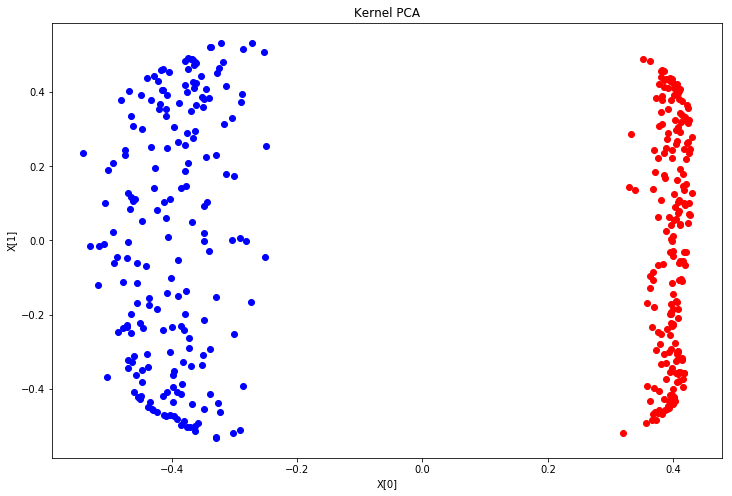

In [45]:
pl.figure(figsize = (12,8))
pl.title("Kernel PCA")


pl.plot( X_new[y == 0, 0], X_new[y == 0, 1], "ro")
pl.plot( X_new[y == 1, 0], X_new[y == 1, 1], "bo")

plt.xlabel('X[0]')
plt.ylabel('X[1]');